# The purpose of this file is to visualize distribution of traffic signs in GTSDB

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
sns.set()

In [2]:
full_dataset_path = "dataset/FullIJCNN2013/gt.txt"
full_dataset_col_names = ["filename", "leftCol", "topRow", "rightCol", "bottomRow", "ClassID"]  
full_dataset_df = pd.read_csv(full_dataset_path, sep=";", header=None, names=full_dataset_col_names)
full_dataset_df

,filename,leftCol,topRow,rightCol,bottomRow,ClassID
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39
...,...,...,...,...,...,...
1208,00896.ppm,808,412,846,450,15
1209,00897.ppm,804,526,828,550,42
1210,00898.ppm,323,504,355,536,4
1211,00898.ppm,817,510,849,542,4


In [3]:
# Read traffic sign names from ReadMe to dataframe
class_dictionary_path = "dataset/FullIJCNN2013/ReadMe.txt"
reg = re.compile("[0-9]+ =")
class_list = []
with open(class_dictionary_path, 'r') as f:
    for cnt, line in enumerate(f):
        if reg.findall(line):
            after_split = line.replace(" = ", "=").strip().split("=")
            class_list.append(after_split)
class_df = pd.DataFrame(class_list, columns=["ClassID", "name"])
class_df.set_index("ClassID", drop=True, inplace=True)        
class_df

,name
ClassID,
0,speed limit 20 (prohibitory)
1,speed limit 30 (prohibitory)
2,speed limit 50 (prohibitory)
3,speed limit 60 (prohibitory)
4,speed limit 70 (prohibitory)
5,speed limit 80 (prohibitory)
6,restriction ends 80 (other)
7,speed limit 100 (prohibitory)
8,speed limit 120 (prohibitory)


In [4]:
# map classes to traffic sign names
class_dict = dict(zip(class_df.index.astype(int), class_df.name))
full_dataset_df['ClassID'] = full_dataset_df['ClassID'].map(class_dict)

In [5]:
def plot_barh_value_counts(value_counts, ylabel, xlabel, fig_name=None, 
                           figsize=(16,12), fontsize=16, lr=0.1, tb=.0, **kwargs):
    """Plots horizintal bar. It displays percentages and frequencies.
       As input it requires result of value_counts() function."""
    
    fig, ax = plt.subplots(figsize=figsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    value_counts.plot(kind="barh", ax=ax)
    total = value_counts.sum()
    for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+lr, i.get_y()+tb, \
               str(round((i.get_width()/total)*100, 3))+"%"+" ("+str(i.get_width())+")",
                fontsize=fontsize, **kwargs)
    plt.tight_layout()
    if fig_name:     
        plt.savefig("results/images/"+fig_name+".png", bbox_inches='tight')

In [6]:
traffic_sign_value_counts = full_dataset_df["ClassID"].value_counts()

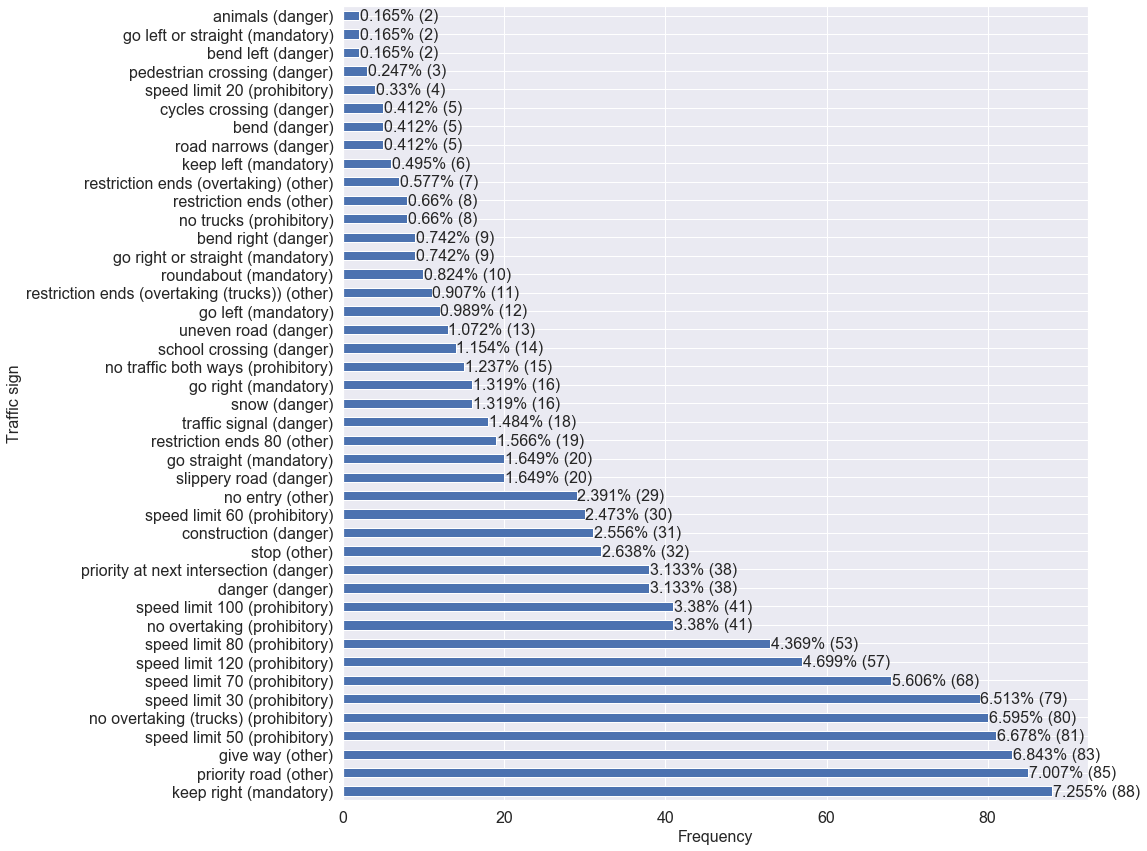

In [15]:
# Plots distribution of all traffic signs in dataset
ylabel = "Traffic sign"
xlabel = "Frequency"
fig_name = "gtsd"
plot_barh_value_counts(traffic_sign_value_counts, ylabel=ylabel, xlabel=xlabel, fig_name=fig_name)


In [76]:
def plot_barv_value_counts(value_counts, ylabel, xlabel, fig_name=None, 
                           figsize=(16,12), fontsize=16, lr=0.1, tb=.0, **kwargs):
    """Plots vertical bar. It displays percentages and frequencies.
       As input it requires result of value_counts() function."""
    
    fig, ax = plt.subplots(figsize=figsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    value_counts.plot(kind="bar", ax=ax)
    total = value_counts.sum()
    for i in ax.patches:
    ### get_width pulls left or right; get_y pushes up or down
        ax.text((i.get_x()+i.get_width()/2.)+lr, i.get_height(), \
               str(round((i.get_height()/total)*100, 3))+"%"+" ("+str(i.get_height())+")",
                fontsize=fontsize, **kwargs)
    plt.tight_layout()
    if fig_name:     
        plt.savefig("results/images/"+fig_name+".png", bbox_inches='tight')

C:\ProgramData\Anaconda3\envs\opencvpy36\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


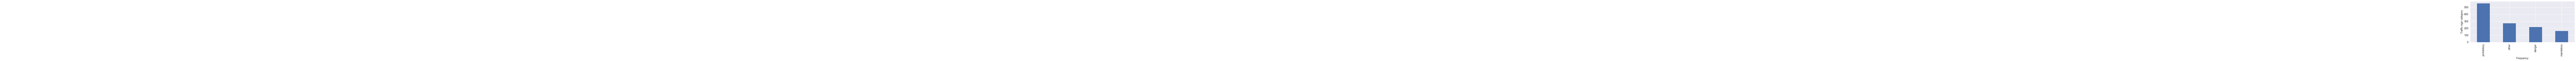

In [9]:
def set_category(x, category):
    """Replace traffic sign names with categories"""
    for cat in category:
        if cat in x:
            return cat
    return x

# Plots distribution of all traffic sign CATEGORIES in dataset
category = ["danger", "mandatory", "prohibitory", "other"]
category_counts = full_dataset_df["ClassID"].apply(lambda x: set_category(x, category)).value_counts()

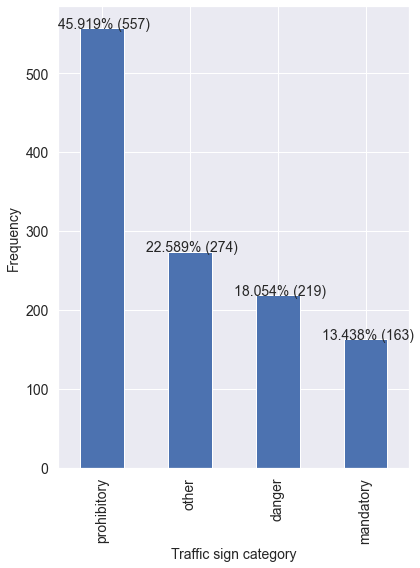

In [78]:
xlabel="Traffic sign category"
ylabel="Frequency"
fig_name = "gtsd_by_category_vertical"
plot_barv_value_counts(category_counts, ylabel=ylabel, xlabel=xlabel,\
                       fig_name=fig_name, figsize=(6,8), fontsize=14, lr=-0.5, tb=.2)

In [116]:
model_code="model2"
train_path= "dataset/"+model_code+"/train_labels.csv"
test_path= "dataset/"+model_code+"/test_labels.csv" 
train_df = pd.read_csv(train_path, sep=",")
test_df = pd.read_csv(test_path, sep=",")

In [113]:
set(train_df["class"]) - set(test_df["class"])

{'animals', 'bend left', 'go left or straight', 'pedestrian crossing'}

In [114]:
for i in test_df["filename"].tolist():
    for j in train_df["filename"].tolist():
        if str(i)==str(j):
            print(i)

00004.png
00004.png
00004.png
00004.png
00008.png
00008.png
00008.png
00008.png
00017.png
00017.png
00017.png
00017.png
00023.png
00023.png
00023.png
00023.png
00023.png
00023.png
00023.png
00023.png
00023.png
00032.png
00032.png
00032.png
00032.png
00043.png
00043.png
00043.png
00043.png
00043.png
00043.png
00043.png
00043.png
00043.png
00048.png
00048.png
00048.png
00048.png
00048.png
00048.png
00048.png
00048.png
00048.png
00071.png
00071.png
00071.png
00071.png
00071.png
00071.png
00071.png
00071.png
00071.png
00074.png
00074.png
00074.png
00074.png
00074.png
00074.png
00074.png
00074.png
00074.png
00078.png
00078.png
00078.png
00078.png
00087.png
00087.png
00087.png
00087.png
00088.png
00088.png
00088.png
00088.png
00088.png
00088.png
00088.png
00088.png
00088.png
00088.png
00088.png
00088.png
00088.png
00088.png
00088.png
00088.png
00093.png
00093.png
00093.png
00093.png
00098.png
00098.png
00098.png
00098.png
00111.png
00111.png
00111.png
00111.png
00112.png
00112.png
00112.png
